## Pima Indians Diabetes Database

#### 1.0 Importando bibliotecas

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport


# import matplotlib
# matplotlib.use('TkAgg')

#### 2.0 Importando dados

In [27]:
url = 'C:/Users/Gabriel-PC/Bootcamp-Data-science/Personal/7 - Aprendizado supervisionado/2023.10.31 aula Charles/diabetes.csv'

#### 3.0 Verificando os dados

In [28]:
df = pd.read_csv(url)

In [29]:
report_df = ProfileReport(df)

In [30]:
# report_df

#### 4.0 Testando os modelos

4.1 Preparando os dados para utilização:

- Divisão de treino e teste;
- Normalização.

In [31]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [32]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df[['Outcome']]

In [33]:
X = df[df.columns[:8]]
y = df[df.columns[-1]]

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.30, random_state= 10, stratify= y) # 30% do dados para teste

In [35]:
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [36]:
len(y_train[y_train == 0]) # verificando balanceamento

350

In [37]:
len(y_train[y_train == 1]) # verificando balanceamento

187

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

4.2 KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 11)

In [40]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [41]:
yhat = knn.predict(X_test)

In [42]:
from sklearn import metrics
print("Accuracy Test:",metrics.accuracy_score(y_test, yhat))
print("Precision Test:",metrics.precision_score(y_test,yhat))
print("Recall Test:",metrics.recall_score(y_test,yhat))

Accuracy Test: 0.7359307359307359
Precision Test: 0.6515151515151515
Recall Test: 0.5308641975308642


In [43]:
n_prime = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]

# metrics_knn = dict()

metrics_knn_acc = []
metrics_knn_pre = []
metrics_knn_rec = []


# for a in n_prime :
#         metrics_knn.setdefault(a,[])

for n in n_prime:

    knn = KNeighborsClassifier(n_neighbors= 11)
    knn.fit(X_train, y_train)
    yhat = knn.predict(X_test)

    acc = metrics.accuracy_score(y_test, yhat)
    pre = metrics.precision_score(y_test,yhat)
    rec = metrics.recall_score(y_test,yhat)

    metrics_knn_acc.append(acc)
    metrics_knn_pre.append(pre)
    metrics_knn_rec.append(rec)

#     metrics_knn[n].append(acc)
#     metrics_knn[n].append(pre)
#     metrics_knn[n].append(rec)

# print(metrics_knn)

print(n_prime)
print(metrics_knn_acc)
print(metrics_knn_pre)
print(metrics_knn_rec)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
[0.7359307359307359, 0.7359307359307359, 0.7359307359307359, 0.7359307359307359, 0.7359307359307359, 0.7359307359307359, 0.7359307359307359, 0.7359307359307359, 0.7359307359307359, 0.7359307359307359, 0.7359307359307359, 0.7359307359307359, 0.7359307359307359, 0.7359307359307359, 0.7359307359307359, 0.7359307359307359, 0.7359307359307359, 0.7359307359307359, 0.7359307359307359, 0.7359307359307359, 0.7359307359307359, 0.7359307359307359, 0.7359307359307359, 0.7359307359307359, 0.7359307359307359]
[0.6515151515151515, 0.6515151515151515, 0.6515151515151515, 0.6515151515151515, 0.6515151515151515, 0.6515151515151515, 0.6515151515151515, 0.6515151515151515, 0.6515151515151515, 0.6515151515151515, 0.6515151515151515, 0.6515151515151515, 0.6515151515151515, 0.6515151515151515, 0.6515151515151515, 0.6515151515151515, 0.6515151515151515, 0.6515151515151515, 0.6515151515151515, 0.6515151515151515, 0

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(6,6), dpi=120)

# plot do primeiro gráfico

ax1.plot(n_prime, metrics_knn_acc, label = 'Accuracy Score', color= 'black')
ax1.set_xlabel('N')
ax1.set_ylabel('Value')
ax1.set_title('Accuracy Score')
ax1.grid(True)

# plot do segundo gráfico

ax2.plot(n_prime, metrics_knn_pre, label = 'Precision Score', color= 'navy')
ax2.set_xlabel('N')
ax2.set_ylabel('Value')
ax2.set_title('Precision Score')
ax2.grid(True)

# plot do terceiro gráfico

ax3.plot(n_prime, metrics_knn_rec, label = 'Recall Score', color= 'orange')
ax3.set_xlabel('N')
ax3.set_ylabel('Value')
ax3.set_title('Recall Score')
ax3.grid(True)

# ajuste do gráfico
plt.tight_layout()

# plot
plt.show()

In [45]:
plt.figure(figsize=(10,6), dpi=120)
plt.plot(n_prime, metrics_knn_acc, label = 'Accuracy Score', color= 'black')
plt.xlabel('N')
plt.ylabel('Value')
plt.title('Accuracy Score')
plt.legend()
plt.grid(True)
plt.show()

#### 4.3 Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import graphviz as grp
from sklearn import tree

In [51]:
dTree = DecisionTreeClassifier(criterion="entropy", max_depth= 3)

In [52]:
dTree = dTree.fit(X_train,y_train)

In [53]:
yhat = dTree.predict(X_test)

In [54]:
print("Accuracy Test:",metrics.accuracy_score(y_test, yhat))
print("Precision Test:",metrics.precision_score(y_test,yhat))
print("Recall Test:",metrics.recall_score(y_test,yhat))

Accuracy Test: 0.7619047619047619
Precision Test: 0.782608695652174
Recall Test: 0.4444444444444444


In [73]:
# dot_data = tree.export_graphviz(dTree, out_file=None)
# graph = grp.Source(dot_data)
# graph.render("diabetes")

In [74]:
# #!conda install -c conda-forge pydotplus -y
# #!conda install -c conda-forge python-graphviz -y
# from  io import StringIO
# import pydotplus
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# from sklearn import tree
# %matplotlib inline

In [75]:
# dot_data = StringIO()
# filename = "Purchasetree.png"
# featureNames = df.columns[0:-1]
# out=tree.export_graphviz(dTree,feature_names=featureNames, out_file=dot_data, class_names= ['P0','P1'], filled=True,  special_characters=True,rotate=False)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_png(filename)
# img = mpimg.imread(filename)
# plt.figure(figsize=(100, 200))
# plt.imshow(img,interpolation='nearest')

#### 4.4 Regressão Logística

In [76]:
from sklearn.linear_model import LogisticRegression

In [78]:
lr = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

In [79]:
yhat = lr.predict(X_test)

In [80]:
print("Accuracy Test:",metrics.accuracy_score(y_test, yhat))
print("Precision Test:",metrics.precision_score(y_test,yhat))
print("Recall Test:",metrics.recall_score(y_test,yhat))

Accuracy Test: 0.7878787878787878
Precision Test: 0.7285714285714285
Recall Test: 0.6296296296296297


In [81]:
y_proba = lr.predict_proba(X_test)
y_proba

array([[0.46978455, 0.53021545],
       [0.6724519 , 0.3275481 ],
       [0.53505268, 0.46494732],
       [0.79964428, 0.20035572],
       [0.45675858, 0.54324142],
       [0.84828698, 0.15171302],
       [0.62583301, 0.37416699],
       [0.77683859, 0.22316141],
       [0.61542198, 0.38457802],
       [0.35916491, 0.64083509],
       [0.8168787 , 0.1831213 ],
       [0.447524  , 0.552476  ],
       [0.76859658, 0.23140342],
       [0.73302444, 0.26697556],
       [0.41798502, 0.58201498],
       [0.73742081, 0.26257919],
       [0.6821832 , 0.3178168 ],
       [0.33747605, 0.66252395],
       [0.6163076 , 0.3836924 ],
       [0.62824696, 0.37175304],
       [0.33997783, 0.66002217],
       [0.5302908 , 0.4697092 ],
       [0.55071378, 0.44928622],
       [0.41807303, 0.58192697],
       [0.80396089, 0.19603911],
       [0.36521006, 0.63478994],
       [0.39296102, 0.60703898],
       [0.57485846, 0.42514154],
       [0.65400037, 0.34599963],
       [0.44268853, 0.55731147],
       [0.

In [89]:
pos_0 = []
pos_1 = []
classe = []

for a in y_proba:
    pos_0.append(a[0])
    pos_1.append(a[1])
    

<Axes: ylabel='Count'>

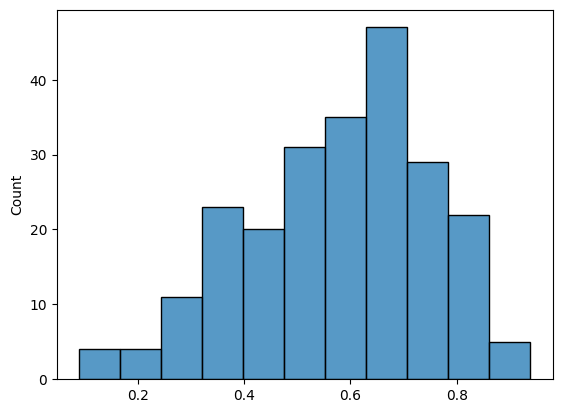

In [90]:
sns.histplot(pos_0)

<Axes: ylabel='Count'>

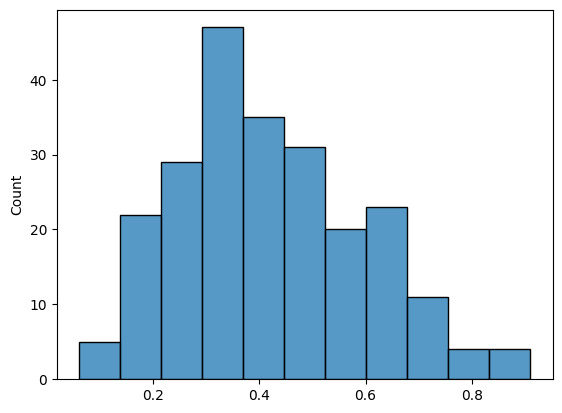

In [91]:
sns.histplot(pos_1)

#### 4.5 SVM

In [94]:
from sklearn import svm

In [95]:
clf = svm.SVC(kernel='rbf').fit(X_train, y_train)

In [96]:
yhat = clf.predict(X_test)

In [97]:
print("Accuracy Test:",metrics.accuracy_score(y_test, yhat))
print("Precision Test:",metrics.precision_score(y_test,yhat))
print("Recall Test:",metrics.recall_score(y_test,yhat))

Accuracy Test: 0.7922077922077922
Precision Test: 0.7323943661971831
Recall Test: 0.6419753086419753
